# Exercise for data scraping and processing
Data come from *finance.yahoo.com*

### 所需要的库函数
- yfinance
- pandas
- numpy
- requests
- bs4
- lxml

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import lxml

## 1. yfinance库的使用
此时，如果想要查看英伟达（NVIDIV）的股票市场情况，可以进行如下操作（英伟达的股票代码是NVDA）。其中**Ticker模块**创建的是一个对象，包含了英伟达股票的所有信息。

In [29]:
nvda = yf.Ticker('NVDA')

In [6]:
print(type(nvda))

<class 'yfinance.ticker.Ticker'>


使用**info**可以查看股票对象的文本信息

In [9]:
nvda.info

{'address1': '2788 San Tomas Expressway',
 'city': 'Santa Clara',
 'state': 'CA',
 'zip': '95051',
 'country': 'United States',
 'phone': '408 486 2000',
 'website': 'https://www.nvidia.com',
 'industry': 'Semiconductors',
 'industryKey': 'semiconductors',
 'industryDisp': 'Semiconductors',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "NVIDIA Corporation provides graphics and compute and networking solutions in the United States, Taiwan, China, Hong Kong, and internationally. The Graphics segment offers GeForce GPUs for gaming and PCs, the GeForce NOW game streaming service and related infrastructure, and solutions for gaming platforms; Quadro/NVIDIA RTX GPUs for enterprise workstation graphics; virtual GPU or vGPU software for cloud-based visual and virtual computing; automotive platforms for infotainment systems; and Omniverse software for building and operating metaverse and 3D internet applications. The Compute & Networki

使用**history**可以查看股票对象的历史数据，包括开盘价(Open)，最高价(High)，最低价(Low)，休盘价(Close)，成交量(Volume)，股息(Dividends)，Stock Splits，

In [31]:
nvda.history(period='max')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.040122,0.044779,0.035585,0.037615,2714688000,0.0,0.0
1999-01-25 00:00:00-05:00,0.040600,0.042033,0.037615,0.041556,510480000,0.0,0.0
1999-01-26 00:00:00-05:00,0.042033,0.042869,0.037734,0.038331,343200000,0.0,0.0
1999-01-27 00:00:00-05:00,0.038451,0.039406,0.036301,0.038212,244368000,0.0,0.0
1999-01-28 00:00:00-05:00,0.038212,0.038451,0.037854,0.038092,227520000,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-13 00:00:00-05:00,138.940002,139.600006,132.539993,134.250000,231514900,0.0,0.0
2024-12-16 00:00:00-05:00,134.179993,134.399994,130.419998,132.000000,237951100,0.0,0.0
2024-12-17 00:00:00-05:00,129.089996,131.589996,126.860001,130.389999,259410300,0.0,0.0


Available paramaters for the **history()** method are:

- period: data period to download (Either Use period parameter or use start and end) Valid periods are: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
- interval: data interval (intraday data cannot extend last 60 days) Valid intervals are: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
- start: If not using period - Download start date string (YYYY-MM-DD) or datetime.
- end: If not using period - Download end date string (YYYY-MM-DD) or datetime.
- prepost: Include Pre and Post market data in results? (Default is False)
- auto_adjust: Adjust all OHLC automatically? (Default is True)
- actions: Download stock dividends and stock splits events? (Default is True)

In [20]:
df = nvda.history(interval='1m', start='2024-12-19', end='2024-12-20')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-12-19 09:30:00-05:00,131.720001,131.899994,131.250000,131.380005,11679906,0.0,0.0
2024-12-19 09:31:00-05:00,131.399994,131.850006,130.900101,131.020096,1436251,0.0,0.0
2024-12-19 09:32:00-05:00,131.035004,131.479996,130.229996,130.392105,1410558,0.0,0.0
2024-12-19 09:33:00-05:00,130.395004,131.179993,130.369995,131.119995,1124221,0.0,0.0
2024-12-19 09:34:00-05:00,131.115005,131.600006,130.949997,131.160004,1180766,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-19 15:55:00-05:00,130.559998,131.149994,130.559998,131.119995,1057684,0.0,0.0
2024-12-19 15:56:00-05:00,131.110001,131.149994,130.854996,130.860001,510281,0.0,0.0
2024-12-19 15:57:00-05:00,130.860001,130.949997,130.722000,130.809906,598585,0.0,0.0


In [18]:
pd.options.plotting.backend = 'plotly'

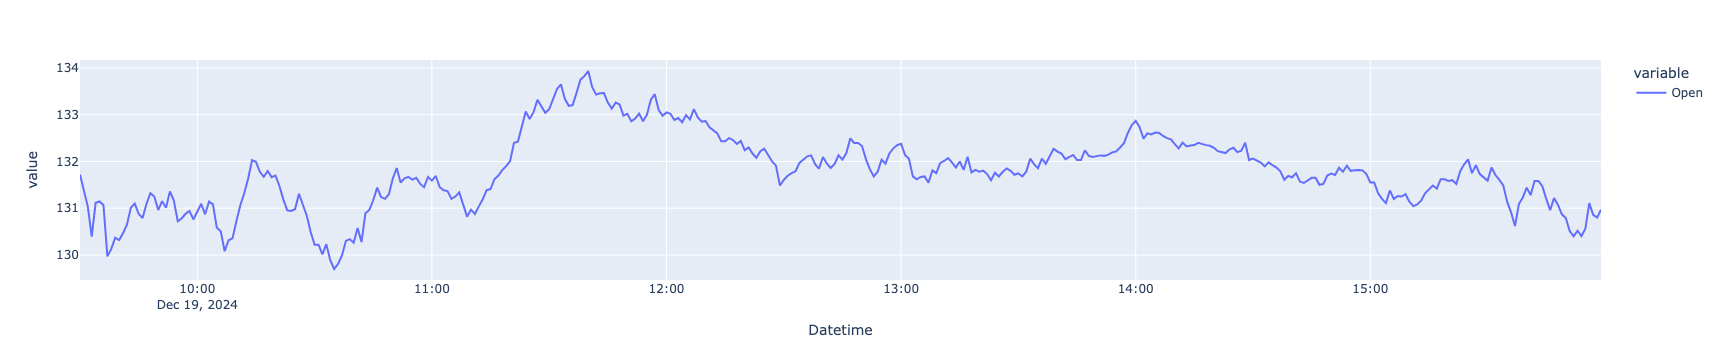

In [24]:
df.loc[:, 'Open'].plot()

可以使用**actions**查看股息和splits

In [33]:
nvda.actions

,Dividends,Stock Splits
Date,,
2000-06-27 00:00:00-04:00,0.000000,2.0
2001-09-10 00:00:00-04:00,0.000000,2.0
2006-04-07 00:00:00-04:00,0.000000,2.0
2007-09-11 00:00:00-04:00,0.000000,1.5
2012-11-20 00:00:00-05:00,0.001875,0.0
2013-02-26 00:00:00-05:00,0.001875,0.0
2013-05-21 00:00:00-04:00,0.001875,0.0
2013-08-20 00:00:00-04:00,0.001875,0.0
2013-11-19 00:00:00-05:00,0.002125,0.0


同样，也可以分开来查看dividends和splits

In [34]:
nvda.dividends

Date
2012-11-20 00:00:00-05:00    0.001875
2013-02-26 00:00:00-05:00    0.001875
2013-05-21 00:00:00-04:00    0.001875
2013-08-20 00:00:00-04:00    0.001875
2013-11-19 00:00:00-05:00    0.002125
2014-02-25 00:00:00-05:00    0.002125
2014-05-20 00:00:00-04:00    0.002125
2014-08-19 00:00:00-04:00    0.002125
2014-11-19 00:00:00-05:00    0.002125
2015-02-24 00:00:00-05:00    0.002125
2015-05-19 00:00:00-04:00    0.002450
2015-08-18 00:00:00-04:00    0.002450
2015-11-18 00:00:00-05:00    0.002875
2016-02-29 00:00:00-05:00    0.002875
2016-05-24 00:00:00-04:00    0.002875
2016-08-23 00:00:00-04:00    0.002875
2016-11-23 00:00:00-05:00    0.003500
2017-02-22 00:00:00-05:00    0.003500
2017-05-19 00:00:00-04:00    0.003500
2017-08-22 00:00:00-04:00    0.003500
2017-11-22 00:00:00-05:00    0.003750
2018-02-22 00:00:00-05:00    0.003750
2018-05-23 00:00:00-04:00    0.003750
2018-08-29 00:00:00-04:00    0.003750
2018-11-29 00:00:00-05:00    0.004000
2019-02-28 00:00:00-05:00    0.004000
2019-05

In [35]:
nvda.splits

Date
2000-06-27 00:00:00-04:00     2.0
2001-09-10 00:00:00-04:00     2.0
2006-04-07 00:00:00-04:00     2.0
2007-09-11 00:00:00-04:00     1.5
2021-07-20 00:00:00-04:00     4.0
2024-06-10 00:00:00-04:00    10.0
Name: Stock Splits, dtype: float64

使用download指令可以同时查看多个股票的数据

In [39]:
data = yf.download('NVDA AAPL', start='2023-12-19', end='2024-12-19')
data

[*********************100%***********************]  2 of 2 completed


Price        Adj Close                   Close                    High  \
Ticker            AAPL        NVDA        AAPL        NVDA        AAPL   
Date                                                                     
2023-12-19  195.979889   49.589939  196.940002   49.604000  196.949997   
2023-12-20  193.880188   48.097359  194.830002   48.111000  197.679993   
2023-12-21  193.730896   48.976116  194.679993   48.990002  197.080002   
2023-12-22  192.656174   48.816162  193.600006   48.830002  195.410004   
2023-12-26  192.108871   49.265030  193.050003   49.278999  193.889999   
...                ...         ...         ...         ...         ...   
2024-12-12  247.960007  137.339996  247.960007  137.339996  248.740005   
2024-12-13  248.130005  134.250000  248.130005  134.250000  249.289993   
2024-12-16  251.039993  132.000000  251.039993  132.000000  251.380005   
2024-12-17  253.479996  130.389999  253.479996  130.389999  253.830002   
2024-12-18  248.050003  128.910004  248.050003  128.910004  254.279999   

Price                          Low                    Open              \
Ticker            NVDA        AAPL        NVDA        AAPL        NVDA   
Date                                                                     
2023-12-19   49.700001  195.889999   48.895000  196.160004   49.424000   
2023-12-20   49.999001  194.830002   48.098000  196.899994   49.654999   
2023-12-21   49.095001  193.500000   48.418999  196.100006   48.811001   
2023-12-22   49.382999  192.970001   48.466999  195.179993   49.195000   
2023-12-26   49.599998  192.830002   48.959999  193.610001   48.967999   
...                ...         ...         ...         ...         ...   
2024-12-12  138.440002  245.679993  135.800003  246.889999  137.080002   
2024-12-13  139.600006  246.240005  132.539993  247.820007  138.940002   
2024-12-16  134.399994  247.649994  130.419998  247.990005  134.179993   
2024-12-17  131.589996  249.779999  126.860001  250.080002  129.089996   
2024-12-18  136.699997  247.740005  128.279999  252.160004  133.860001   

Price         Volume             
Ticker          AAPL       NVDA  
Date                             
2023-12-19  40714100  464444000  
2023-12-20  52242800  397894000  
2023-12-21  46482500  300425000  
2023-12-22  37122800  252507000  
2023-12-26  28919300  244200000  
...              ...        ...  
2024-12-12  32777500  159211400  
2024-12-13  33155300  231514900  
2024-12-16  51694800  237951100  
2024-12-17  51356400  259410300  
2024-12-18  56774100  277444500  

[252 rows x 12 columns]

In [37]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


可以使用data['Open']['NVDA']直接查看某只股票的开盘价

In [41]:
data['Open']['NVDA']

Date
2023-12-19     49.424000
2023-12-20     49.654999
2023-12-21     48.811001
2023-12-22     49.195000
2023-12-26     48.967999
                 ...    
2024-12-12    137.080002
2024-12-13    138.940002
2024-12-16    134.179993
2024-12-17    129.089996
2024-12-18    133.860001
Name: NVDA, Length: 252, dtype: float64

使用group_by=‘ticker’参数，可以将查看的多只股票按照股票名称分组

In [44]:
data = yf.download('NVDA AAPL', period='1mo', group_by='ticker')

[*********************100%***********************]  2 of 2 completed


In [45]:
data

Ticker            NVDA                                                  \
Price             Open        High         Low       Close   Adj Close   
Date                                                                     
2024-11-20  147.410004  147.559998  142.729996  145.889999  145.879944   
2024-11-21  149.350006  152.889999  140.699997  146.669998  146.659897   
2024-11-22  145.929993  147.160004  141.100006  141.949997  141.940216   
2024-11-25  141.990005  142.050003  135.820007  136.020004  136.010635   
2024-11-26  137.699997  139.300003  135.669998  136.919998  136.910568   
2024-11-27  135.009995  137.220001  131.800003  135.339996  135.330673   
2024-11-29  136.779999  139.350006  136.050003  138.250000  138.240479   
2024-12-02  138.830002  140.449997  137.820007  138.630005  138.620453   
2024-12-03  138.259995  140.539993  137.949997  140.259995  140.250336   
2024-12-04  142.000000  145.789993  140.289993  145.139999  145.130005   
2024-12-05  145.110001  146.539993  143.949997  145.059998  145.059998   
2024-12-06  144.600006  145.699997  141.309998  142.440002  142.440002   
2024-12-09  138.970001  139.949997  137.130005  138.809998  138.809998   
2024-12-10  139.009995  141.820007  133.789993  135.070007  135.070007   
2024-12-11  137.360001  140.169998  135.210007  139.309998  139.309998   
2024-12-12  137.080002  138.440002  135.800003  137.339996  137.339996   
2024-12-13  138.940002  139.600006  132.539993  134.250000  134.250000   
2024-12-16  134.179993  134.399994  130.419998  132.000000  132.000000   
2024-12-17  129.089996  131.589996  126.860001  130.389999  130.389999   
2024-12-18  133.860001  136.699997  128.279999  128.910004  128.910004   
2024-12-19  131.759995  134.029999  129.550003  130.679993  130.679993   

Ticker                       AAPL                                      \
Price          Volume        Open        High         Low       Close   
Date                                                                    
2024-11-20  309871700  228.059998  229.929993  225.889999  229.000000   
2024-11-21  400946600  228.880005  230.160004  225.710007  228.520004   
2024-11-22  236406200  228.059998  230.720001  228.059998  229.869995   
2024-11-25  344941900  231.460007  233.250000  229.740005  232.869995   
2024-11-26  190287700  233.330002  235.570007  233.330002  235.059998   
2024-11-27  226370900  234.470001  235.690002  233.809998  234.929993   
2024-11-29  141863200  234.809998  237.809998  233.970001  237.330002   
2024-12-02  171682800  237.270004  240.789993  237.160004  239.589996   
2024-12-03  164414000  239.809998  242.759995  238.899994  242.649994   
2024-12-04  231224300  242.869995  244.110001  241.250000  243.009995   
2024-12-05  172621200  243.990005  244.539993  242.130005  243.039993   
2024-12-06  188505600  242.910004  244.630005  242.080002  242.839996   
2024-12-09  189308600  241.830002  247.240005  241.750000  246.750000   
2024-12-10  210020900  246.889999  248.210007  245.339996  247.770004   
2024-12-11  184905200  247.960007  250.800003  246.259995  246.490005   
2024-12-12  159211400  246.889999  248.740005  245.679993  247.960007   
2024-12-13  231514900  247.820007  249.289993  246.240005  248.130005   
2024-12-16  237951100  247.990005  251.380005  247.649994  251.039993   
2024-12-17  259410300  250.080002  253.830002  249.779999  253.479996   
2024-12-18  277444500  252.160004  254.279999  247.740005  248.050003   
2024-12-19  208872400  247.500000  252.000000  247.089996  249.789993   

Ticker                            
Price        Adj Close    Volume  
Date                              
2024-11-20  229.000000  35169600  
2024-11-21  228.520004  42108300  
2024-11-22  229.869995  38168300  
2024-11-25  232.869995  90152800  
2024-11-26  235.059998  45986200  
2024-11-27  234.929993  33498400  
2024-11-29  237.330002  28481400  
2024-12-02  239.589996  48137100  
2024-12-03  242.649994  38861000  
2024-12-04  243.009995  44383900  
2024-12-05  243

<hr>
<hr>

## 2. Webscraping
网页内容提取（爬虫技术）通常需要用到requests库来获取网页内容，使用BeautifulSoup库来解析获取的网页内容
### Steps for extracting the data
1. **Send** an HTTP request to the web page using the requests library.
2. **Parse** the HTML content of the web page using BeautifulSoup.
3. **Identify** the HTML **tags** that contain the data you want to extract.
4. Use BeautifulSoup methods to **extract** the data from the HTML tags.
5. **Print** the extracted data

In [46]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [55]:
url = 'https://zh.wikipedia.org/wiki/%E9%AB%98%E6%94%B6%E5%85%A5%E7%B6%93%E6%BF%9F%E9%AB%94'

通过get()方法，可以获取网页上的内容信息，使用text将网页内容转化为文本信息

In [58]:
data = requests.get(url).text

In [59]:
data

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="zh" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>高收入經濟體 - 维基百科，自由的百科全书</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-f

In [61]:
soup = BeautifulSoup(data, 'html.parser')

In [62]:
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="zh">
<head>
<meta charset="utf-8"/>
<title>高收入經濟體 - 维基百科，自由的百科全书</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-featu

<hr>
<hr>
<center>

### Working on HTML table  </center>
<br>

These are the following tags which are used while creating HTML tables.

* &lt;table&gt;: This tag is a root tag used to define the **start** and **end** of the table. All the content of the table is enclosed within these tags. 


* &lt;tr&gt;: This tag is used to define a **table row**. Each row of the table is defined within this tag.

* &lt;td&gt;: This tag is used to define a **table cell**. Each cell of the table is defined within this tag. You can specify the content of the cell between the opening and closing <td> tags.

* &lt;th&gt;: This tag is used to define a **header cell** in the table. The header cell is used to describe the contents of a column or row. By default, the text inside a <th> tag is bold and centered.

* &lt;tbody&gt;: This is the **main content of the table**, which is defined using the <tbody> tag. It contains one or more rows of <tr> elements.

<hr>
<hr>



In [70]:
soup.table

<table class="wikitable sortable">
<tbody><tr>
<th>数据年份</th>
<th>門檻<br/>（美元）</th>
<th>发布日期
</th></tr>
<tr>
<td>1987</td>
<td>6,000</td>
<td>1988-10-02
</td></tr>
<tr>
<td>1988</td>
<td>6,000</td>
<td>1989-09-13
</td></tr>
<tr>
<td>1989</td>
<td>6,000</td>
<td>1990-08-29
</td></tr>
<tr>
<td>1990</td>
<td>7,620</td>
<td>1991-09-11
</td></tr>
<tr>
<td>1991</td>
<td>7,910</td>
<td>1992-08-24
</td></tr>
<tr>
<td>1992</td>
<td>8,355</td>
<td>1993-09-09
</td></tr>
<tr>
<td>1993</td>
<td>8,625</td>
<td>1994-09-02
</td></tr>
<tr>
<td>1994</td>
<td>8,955</td>
<td>1995-06-08
</td></tr>
<tr>
<td>1995</td>
<td>9,385</td>
<td>1996-06-03
</td></tr>
<tr>
<td>1996</td>
<td>9,645</td>
<td>1997-07-01
</td></tr>
<tr>
<td>1997</td>
<td>9,655</td>
<td>1998-07-01
</td></tr>
<tr>
<td>1998</td>
<td>9,360</td>
<td>1999-07-01
</td></tr>
<tr>
<td>1999</td>
<td>9,265</td>
<td>2000-07-01
</td></tr>
<tr>
<td>2000</td>
<td>9,265</td>
<td>2001-07-01
</td></tr>
<tr>
<td>2001</td>
<td>9,205</td>
<td>2002-07-01
</td></tr

We will use <b>find()</b> and <b>find_all()</b> methods of the BeautifulSoup object to locate the table body and table row respectively in the HTML. 
   * The <i>find() method </i> will return particular tag content.
   * The <i>find_all()</i> method returns a list of all matching tags in the HTML.

find(‘tr’)方法会查找表格中第一个行（一般包含一个表的表头数据）。

In [74]:
soup.find('tr')

<tr>
<th>数据年份</th>
<th>門檻<br/>（美元）</th>
<th>发布日期
</th></tr>

find_all('tr')方法会查找所有表的所有行

In [75]:
soup.find_all('tr')

[<tr>
 <th>数据年份</th>
 <th>門檻<br/>（美元）</th>
 <th>发布日期
 </th></tr>,
 <tr>
 <td>1987</td>
 <td>6,000</td>
 <td>1988-10-02
 </td></tr>,
 <tr>
 <td>1988</td>
 <td>6,000</td>
 <td>1989-09-13
 </td></tr>,
 <tr>
 <td>1989</td>
 <td>6,000</td>
 <td>1990-08-29
 </td></tr>,
 <tr>
 <td>1990</td>
 <td>7,620</td>
 <td>1991-09-11
 </td></tr>,
 <tr>
 <td>1991</td>
 <td>7,910</td>
 <td>1992-08-24
 </td></tr>,
 <tr>
 <td>1992</td>
 <td>8,355</td>
 <td>1993-09-09
 </td></tr>,
 <tr>
 <td>1993</td>
 <td>8,625</td>
 <td>1994-09-02
 </td></tr>,
 <tr>
 <td>1994</td>
 <td>8,955</td>
 <td>1995-06-08
 </td></tr>,
 <tr>
 <td>1995</td>
 <td>9,385</td>
 <td>1996-06-03
 </td></tr>,
 <tr>
 <td>1996</td>
 <td>9,645</td>
 <td>1997-07-01
 </td></tr>,
 <tr>
 <td>1997</td>
 <td>9,655</td>
 <td>1998-07-01
 </td></tr>,
 <tr>
 <td>1998</td>
 <td>9,360</td>
 <td>1999-07-01
 </td></tr>,
 <tr>
 <td>1999</td>
 <td>9,265</td>
 <td>2000-07-01
 </td></tr>,
 <tr>
 <td>2000</td>
 <td>9,265</td>
 <td>2001-07-01
 </td></tr>,
 <tr>
 <td

In [98]:
high_income = pd.DataFrame(columns=['Date', 'Threshold', 'Pub_Date'])

In [99]:
for row in soup.find('tbody').find_all('tr'):
    col = row.find_all('td')
    try:
        date = col[0].text
        threshold = col[1].text
        pub_date = col[2].text.strip()
    
        high_income = pd.concat([high_income, pd.DataFrame({"Date":[date], "Threshold":[threshold], "Pub_Date":[pub_date]})], ignore_index=True)
        #print(col[0].text)
    except:
        continue

In [100]:
high_income

,Date,Threshold,Pub_Date
0,1987,"6,000",1988-10-02
1,1988,"6,000",1989-09-13
2,1989,"6,000",1990-08-29
3,1990,"7,620",1991-09-11
4,1991,"7,910",1992-08-24
5,1992,"8,355",1993-09-09
6,1993,"8,625",1994-09-02
7,1994,"8,955",1995-06-08
8,1995,"9,385",1996-06-03
9,1996,"9,645",1997-07-01


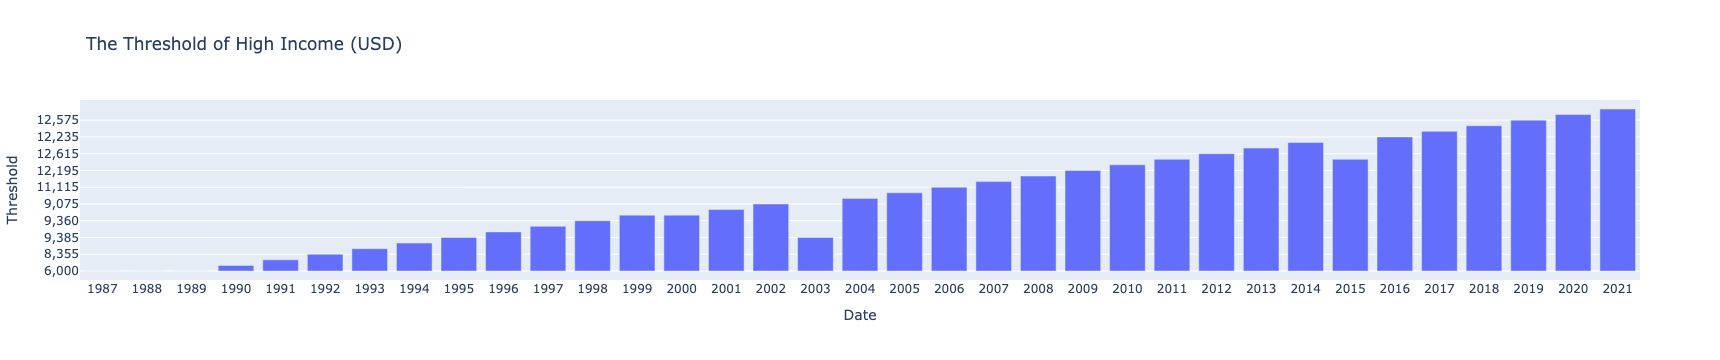

In [107]:
high_income.loc[:,['Date', 'Threshold']].plot.bar(x='Date', y='Threshold', title='The Threshold of High Income (USD)')

<hr>
<hr>

## 3. Exacting date with pandas library

In [123]:
# Wikipedia: Immigration to Sweden'
url = 'https://en.wikipedia.org/wiki/Immigration_to_Sweden'

In [200]:
data = pd.read_html(url)

In [201]:
# 共计20个表，其中1～5，12有数据。13～14附录数据
d_gross = data[1]  # Gross immigration by country
d_net = data[2]  # Net immigration by country

In [202]:
d_gross

,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total 2010–2020
0,India,2206,1777,2142,2511,3069,3601,4247,5717,7311,7389,4061,44031
1,Syria,1261,1769,5349,14397,26113,30590,51540,22327,14387,6128,3293,177154
2,Poland,4517,4500,4505,4677,5138,5596,5078,4405,3817,3177,2530,47940
3,Pakistan,1682,986,998,921,904,1189,1302,1847,2586,3225,2441,18081
4,Germany,2338,2355,2313,2343,2311,2428,2666,2637,2547,2614,2393,26945
5,Iraq,5321,5292,4247,3205,3391,4082,4901,7236,4883,3601,2271,48430
6,Afghanistan,1824,3209,4167,3801,3436,2974,3607,9297,8093,6845,2270,49523
7,United Kingdom,1512,1908,1760,1699,1966,1813,2047,2154,2270,2072,2084,21285
8,Iran,3249,2751,2971,2692,2489,2054,2469,4264,4053,3485,2082,32559
9,Turkey,2435,2133,2012,1531,1436,1495,1584,2036,2409,2418,1853,21342


In [203]:
d_net

,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total 2010–2020
0,India,1442,810,833,1208,1367,1340,2509,3993,5596,5364,2135,26597
1,Syria,1159,1653,5211,14263,25914,30400,51290,22028,13850,5504,2442,173714
2,Poland,3086,2970,2816,3247,3883,4170,3553,2795,2002,1120,289,29931
3,Pakistan,1131,296,218,240,229,301,995,1520,2226,2873,2010,12039
4,Germany,992,941,980,960,1029,984,1385,1364,1101,1028,829,11593
5,Iraq,3993,3928,2568,1275,1451,1940,3486,5900,3467,2172,757,30937
6,Afghanistan,1668,3075,4006,3647,3305,2807,3493,9155,7966,6687,2061,47870
7,United Kingdom,554,1129,863,782,1125,945,1263,1342,1422,1045,1078,11548
8,Iran,2383,1875,2004,1756,1398,826,1791,3646,3509,2913,1431,23532
9,Turkey,1930,1521,1341,780,646,420,927,1447,1853,1873,610,13348


In [233]:
# 设置d_trip为DataFrame数据，索引来自国家，列名来自年份
d_trip = pd.DataFrame(index=d_gross.iloc[:,0], columns=d_gross.columns)

In [234]:
d_trip = d_trip.drop(columns=['Country'])

In [206]:
d_trip = d_gross.iloc[:, 1:] - d_net.iloc[:, 1:]

TypeError: unsupported operand type(s) for -: 'int' and 'str'

此时不能直接减，报错信息表示有int和str在相减。所以下一步检查数据类型

In [166]:
d_gross.dtypes

Country            object
2010                int64
2011                int64
2012                int64
2013                int64
2014                int64
2015                int64
2016                int64
2017                int64
2018                int64
2019                int64
2020                int64
Total 2010–2020     int64
dtype: object

In [167]:
d_net.dtypes

Country            object
2010                int64
2011                int64
2012                int64
2013               object
2014               object
2015               object
2016                int64
2017                int64
2018                int64
2019                int64
2020               object
Total 2010–2020     int64
dtype: object

在d_net数据中，存在不是int的数据类型，查明是数字带了负号引起的。

In [207]:
d_net

,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total 2010–2020
0,India,1442,810,833,1208,1367,1340,2509,3993,5596,5364,2135,26597
1,Syria,1159,1653,5211,14263,25914,30400,51290,22028,13850,5504,2442,173714
2,Poland,3086,2970,2816,3247,3883,4170,3553,2795,2002,1120,289,29931
3,Pakistan,1131,296,218,240,229,301,995,1520,2226,2873,2010,12039
4,Germany,992,941,980,960,1029,984,1385,1364,1101,1028,829,11593
5,Iraq,3993,3928,2568,1275,1451,1940,3486,5900,3467,2172,757,30937
6,Afghanistan,1668,3075,4006,3647,3305,2807,3493,9155,7966,6687,2061,47870
7,United Kingdom,554,1129,863,782,1125,945,1263,1342,1422,1045,1078,11548
8,Iran,2383,1875,2004,1756,1398,826,1791,3646,3509,2913,1431,23532
9,Turkey,1930,1521,1341,780,646,420,927,1447,1853,1873,610,13348


两种处理方式，
1. 手动将带有负号的字符串数据变成数字[x]
3. ？

In [208]:
d_net.loc[12, ['2013', '2014']] = [-177, -35]
d_net.loc[10, '2015'] = -253
d_net.loc[11, '2020'] = -286

In [210]:
d_net.dtypes

Country            object
2010                int64
2011                int64
2012                int64
2013               object
2014               object
2015               object
2016                int64
2017                int64
2018                int64
2019                int64
2020               object
Total 2010–2020     int64
dtype: object

|errors值|行为|示例结果|
|----|----|----|
|'raise'|抛出异常|ValueError|
|'coerce'|将无效值替换为NaN|[1.0, 2.0, NaN, 4.0]|
|'ignore'|保持原始数据不变|['1', '2', 'a', '4']|

In [216]:
d_net.iloc[:, 1:] = d_net.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

In [217]:
d_net.dtypes

Country            object
2010                int64
2011                int64
2012                int64
2013               object
2014               object
2015               object
2016                int64
2017                int64
2018                int64
2019                int64
2020               object
Total 2010–2020     int64
dtype: object

In [224]:
pd.to_numeric(d_net.loc[:,'2013'])

0      1208
1     14263
2      3247
3       240
4       960
5      1275
6      3647
7       782
8      1756
9       780
10     1124
11      359
12     -177
13      849
14     2843
15      527
16     1317
17     1445
18    10152
19      191
20    50715
Name: 2013, dtype: int64

In [228]:
pd.to_numeric(d_net.loc[:,'2014'])

0      1367
1     25914
2      3883
3       229
4      1029
5      1451
6      3305
7      1125
8      1398
9       646
10      809
11      568
12      -35
13      708
14     5225
15      616
16     1458
17     1168
18     3714
19      263
20    51237
Name: 2014, dtype: int64

In [229]:
pd.to_numeric(d_net.loc[:,'2015'])

0      1340
1     30400
2      4170
3       301
4       984
5      1940
6      2807
7       945
8       826
9       420
10     -253
11      796
12      223
13      107
14     6735
15      630
16     1768
17      692
18     2739
19      226
20    55830
Name: 2015, dtype: int64

In [230]:
pd.to_numeric(d_net.loc[:,'2020'])

0      2135
1      2442
2       289
3      2010
4       829
5       757
6      2061
7      1078
8      1431
9       610
10      756
11     -286
12      145
13      602
14     1425
15      261
16      465
17      797
18      103
19      746
20    33581
Name: 2020, dtype: int64

In [236]:
d_trip = d_gross.iloc[:, 1:] - d_net.iloc[:, 1:]

In [237]:
d_trip

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total 2010–2020
0,764,967,1309,1303,1702,2261,1738,1724,1715,2025,1926,17434
1,102,116,138,134,199,190,250,299,537,624,851,3440
2,1431,1530,1689,1430,1255,1426,1525,1610,1815,2057,2241,18009
3,551,690,780,681,675,888,307,327,360,352,431,6042
4,1346,1414,1333,1383,1282,1444,1281,1273,1446,1586,1564,15352
5,1328,1364,1679,1930,1940,2142,1415,1336,1416,1429,1514,17493
6,156,134,161,154,131,167,114,142,127,158,209,1653
7,958,779,897,917,841,868,784,812,848,1027,1006,9737
8,866,876,967,936,1091,1228,678,618,544,572,651,9027
9,505,612,671,751,790,1075,657,589,556,545,1243,7994


In [240]:
d_trip = d_trip.reset_index().set_index(d_gross.iloc[:,0])

In [241]:
d_trip = d_trip.drop(columns='index')
d_trip

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total 2010–2020
Country,,,,,,,,,,,,
India,764,967,1309,1303,1702,2261,1738,1724,1715,2025,1926,17434
Syria,102,116,138,134,199,190,250,299,537,624,851,3440
Poland,1431,1530,1689,1430,1255,1426,1525,1610,1815,2057,2241,18009
Pakistan,551,690,780,681,675,888,307,327,360,352,431,6042
Germany,1346,1414,1333,1383,1282,1444,1281,1273,1446,1586,1564,15352
Iraq,1328,1364,1679,1930,1940,2142,1415,1336,1416,1429,1514,17493
Afghanistan,156,134,161,154,131,167,114,142,127,158,209,1653
United Kingdom,958,779,897,917,841,868,784,812,848,1027,1006,9737
Iran,866,876,967,936,1091,1228,678,618,544,572,651,9027


In [252]:
d_trip.loc['China', :]

2010                 649
2011                1152
2012                1476
2013                1106
2014                1763
2015                2787
2016                1125
2017                1131
2018                1045
2019                 927
2020                1082
Total 2010–2020    13990
Name: China, dtype: object